In [1]:
import json
import pandas as pd
import numpy as np

data_pd = pd.read_csv(r'C:\Users\Fernando\ProcesadoMasivoDatos\Proyecto\suj-12\StreamingHistory_suj12.csv', encoding="utf8")

In [2]:
track_name = data_pd.trackName.unique()
len(track_name)

3834

In [3]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0             Khalid           1156
1               Sech            468
2  Lofi Fruits Music            333
3      Martin Garrix            324
4          Avocuddle            319
5          Bad Bunny            299
6        Danny Avila            254
7               Kygo            209
8           J Balvin            202
9             Koosen            200

<AxesSubplot:ylabel='Artist'>

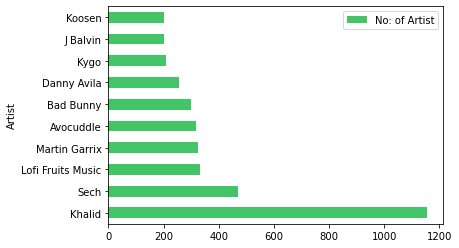

In [4]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')


In [5]:
df1_list = df1['Artist'].head(10).tolist()


In [6]:
print(df1_list)

['Khalid', 'Sech', 'Lofi Fruits Music', 'Martin Garrix', 'Avocuddle', 'Bad Bunny', 'Danny Avila', 'Kygo', 'J Balvin', 'Koosen']


In [7]:
a =np.array(df1_list).astype(str)

In [8]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['My Bad', 'Trofeo', 'Hola - Remix', 'Relación', 'Uniforme', 'Si Te Vas', 'Imaginate', 'Perreo en La Luna', 'DJ No Pare (feat. Zion, Dalex, Lenny Tavárez) - Remix', 'El Favor (with Nicky Jam & Sech, feat. Farruko, Zion & Lunay)', 'With Or Without You - Remastered', 'One', 'Si Te Vas/Que Tengo Que Hacer - Original Remix', 'Yo Te Esperaré', 'As Your Friend', 'A Little More (feat. Sansa)', 'Dandole Remix', 'Creep On Me', 'Calavera', 'Waves', 'Merengue Electronico (Rompe Consola)', "I Can't Fall in Love Without You", 'Me And My Broken Heart', 'Rompe la Cintura', "God's Plan", 'Imaginary', 'Ganas de Ti', 'Love Me Now', 'Chiba', 'Quien Dijo Amigos?', 'Bailando por Ahi', 'Eleven (feat. Summer Walker)', 'Location', 'Eleven', 'Saved', 'Trigger', 'Alive', 'Silence', 'Self', 'Better', 'Saturday Nights', 'Outta My Head (with John Mayer)', 'Shot Down', 'Sola & Vacía', 'Elegí (feat. Dímelo Flow)', 'Negro', 'Suave - Remix', 'Amarillo', "Ponte Pa' Mi", 'Nunca Estoy', 'Ella No Quiere Rosé', '4K', 'Rela

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'

scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [10]:
id_list=[]
for i in track_list:

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['1DUSuNhF8P5vUGNPpQiZa5', '4d2xH6EHSOycRY4BjOTKel', '5stPVcRqb4qixbafP9e8lt', '35UUpTmrcFXNIVIN26ujXl', '0wMs7DPFOnToNAoecvAFQc', '2x59pa3xDf8hHZ4N3f5fGQ', '29ShXDWDedEwZkYc8Du08N', '0RDgqtvOHLwcI6yz9bjsZV', '1ndyl3wJCFs872XZ3ztPk6', '684EjRHwNsZQ9hCQxL4NYL', '6ADSaE87h8Y3lccZlBJdXH', '2aZTIJu89HsZYN9BydculE', '0OyHCmkCp2qZJ44ZKB26fX', '0mGvaKpwLYoybnIoboC3uS', '7aLemVaGw5bt4u7wPXm7Lm', '6SKkN6yuQFnzMEHMQR3sWw', '6m66fAEmE5uQrHiqRXEnV2', '4s1HdR4GZb9OQtfTq1avcq', '5dgA6aIoYJvTz48qAI0rPf', '4g1Gc7h3m7ml8wkmMD1kbN', '1Q2WPcHRVK16zh9TR6isEq', '4VPXFi4vFTtS9wHe6oMQaT', '1oew3nFNY3vMacJAsvry0S', '1ezgTiY0CbnlH9IRHwNXdz', '6DCZcSspjsKoFjzjrWoCdn', '2TgDK4TC5KsywTYafAE4Gd', '4kuQJb8ghj6268fBTtB3bX', '6nxQdXa1uAL0rY72wPZu89', '21N4Buj4xsyLb218lYle61', '5mmeEKfSZZiggiRsNF5kot', '6sHBvzRsuGunQTfCk18KXi', '18O00Y7yrkJ0pRXm1n21Og', '5Km4r87BoX2qqtoprYS1gh', '1ToprX3cpBiXoAe5eNSk74', '248OFOZef6ShXv6DGgbnxU', '5CK5ieTT0lkZy49OFjDcaV', '1L94M3KIu7QluZe63g64rv', '7vGuf3Y35N4wmASOKLUVVU', '1hmlCbcazS

In [11]:
id_list = [x for x in id_list if x is not None]

In [12]:
print(len(id_list))

17267


In [13]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [14]:
import time

In [16]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|████████████████████████████████████████████████████████████████████████████| 17267/17267 [34:23<00:00,  8.37it/s]


In [17]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [18]:
TrackIDs_StillNotParsed [:10]

[]

In [19]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [20]:
audioFeaturesDF_AllTracks.head()

track_id  energy  liveness    tempo  speechiness  \
0  1DUSuNhF8P5vUGNPpQiZa5   0.568    0.2570   84.999       0.0823   
1  4d2xH6EHSOycRY4BjOTKel   0.758    0.0872  153.920       0.0554   
2  5stPVcRqb4qixbafP9e8lt   0.672    0.0781  181.857       0.3110   
3  35UUpTmrcFXNIVIN26ujXl   0.771    0.2840  171.943       0.0959   
4  0wMs7DPFOnToNAoecvAFQc   0.863    0.2540  173.946       0.1390   

   acousticness  instrumentalness  time_signature  danceability  key  \
0        0.5430          0.266000             4.0         0.645  5.0   
1        0.2670          0.000813             4.0         0.744  6.0   
2        0.4710          0.000000             4.0         0.654  0.0   
3        0.0337          0.000002             4.0         0.793  5.0   
4        0.0656          0.000000             4.0         0.739  9.0   

   duration_ms  loudness  valence  mode                             track_uri  
0     166101.0    -9.127    0.391   0.0  spotify:track:1DUSuNhF8P5vUGNPpQiZa5  
1     206761.0    -4.040    0.879   1.0  spotify:track:4d2xH6EHSOycRY4BjOTKel  
2     249520.0    -5.980    0.343   0.0  spotify:track:5stPVcRqb4qixbafP9e8lt  
3     247308.0    -3.417    0.835   1.0  spotify:track:35UUpTmrcFXNIVIN26ujXl  
4     279280.0    -3.667    0.773   1.0  spotify:track:0wMs7DPFOnToNAoecvAFQc

In [21]:
audioFeaturesDF_AllTracks.shape

(17267, 15)

In [22]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks_suj12.csv")

In [23]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks_suj12.csv").drop(["Unnamed: 0"], axis = 1)

In [24]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   1DUSuNhF8P5vUGNPpQiZa5   0.568    0.2570   84.999       0.0823   
1   4d2xH6EHSOycRY4BjOTKel   0.758    0.0872  153.920       0.0554   
2   5stPVcRqb4qixbafP9e8lt   0.672    0.0781  181.857       0.3110   
3   35UUpTmrcFXNIVIN26ujXl   0.771    0.2840  171.943       0.0959   
4   0wMs7DPFOnToNAoecvAFQc   0.863    0.2540  173.946       0.1390   
5   2x59pa3xDf8hHZ4N3f5fGQ   0.491    0.1110  133.427       0.0451   
6   29ShXDWDedEwZkYc8Du08N   0.751    0.0808  169.884       0.2280   
7   0RDgqtvOHLwcI6yz9bjsZV   0.757    0.3670  174.013       0.2900   
8   1ndyl3wJCFs872XZ3ztPk6   0.709    0.0809  170.001       0.0879   
9   684EjRHwNsZQ9hCQxL4NYL   0.647    0.1120   87.988       0.0737   
10  6ADSaE87h8Y3lccZlBJdXH   0.429    0.1410  110.171       0.0285   
11  2aZTIJu89HsZYN9BydculE   0.625    0.5820   88.042       0.0450   
12  0OyHCmkCp2qZJ44ZKB26fX   0.689    0.0415  125.010       0.0564   
13  0mGvaKpwLYoybnIoboC3uS   0.810    0.0809  175.697       0.1330   
14  7aLemVaGw5bt4u7wPXm7Lm   0.761    0.1040  128.033       0.0678   
15  6SKkN6yuQFnzMEHMQR3sWw   0.742    0.1120  127.978       0.0386   
16  6m66fAEmE5uQrHiqRXEnV2   0.759    0.6980  117.043       0.0486   
17  4s1HdR4GZb9OQtfTq1avcq   0.597    0.1970  134.598       0.1400   
18  5dgA6aIoYJvTz48qAI0rPf   0.736    0.1130   84.033       0.0430   
19  4g1Gc7h3m7ml8wkmMD1kbN   0.771    0.1100  136.053       0.0626   

    acousticness  instrumentalness  time_signature  danceability   key  \
0       0.543000          0.266000             4.0         0.645   5.0   
1       0.267000          0.000813             4.0         0.744   6.0   
2       0.471000          0.000000             4.0         0.654   0.0   
3       0.033700          0.000002             4.0         0.793   5.0   
4       0.065600          0.000000             4.0         0.739   9.0   
5       0.623000          0.021500             3.0         0.569   5.0   
6       0.316000          0.000000             4.0         0.691   0.0   
7       0.268000          0.000000             4.0         0.711   1.0   
8       0.045100          0.000005             4.0         0.743   3.0   
9       0.113000          0.000000             4.0         0.747   9.0   
10      0.000202          0.355000             4.0         0.540   2.0   
11      0.064400          0.000000             4.0         0.659   4.0   
12      0.064500          0.000003             4.0         0.853  10.0   
13      0.234000          0.000000             4.0         0.481   9.0   
14      0.046700          0.000000             4.0         0.654   6.0   
15      0.007720          0.000770             4.0         0.425  11.0   
16      0.040900          0.000013             4.0         0.812   0.0   
17      0.347000          0.000010             5.0         0.449   9.0   
18      0.326000          0.000010             4.0         0.668   3.0   
19      0.064900          0.000000             4.0         0.494   1.0   

    duration_ms  loudness  valence  mode                             track_uri  
0      166101.0    -9.127    0.391   0.0  spotify:track:1DUSuNhF8P5vUGNPpQiZa5  
1      206761.0    -4.040    0.879   1.0  spotify:track:4d2xH6EHSOycRY4BjOTKel  
2      249520.0    -5.980    0.343   0.0  spotify:track:5stPVcRqb4qixbafP9e8lt  
3      247308.0    -3.417    0.835   1.0  spotify:track:35UUpTmrcFXNIVIN26ujXl  
4      279280.0    -3.667    0.773   1.0  spotify:track:0wMs7DPFOnToNAoecvAFQc  
5      516667.0    -8.530    0.204   1.0  spotify:track:2x59pa3xDf8hHZ4N3f5fGQ  
6      225013.0    -4.275    0.672   1.0  spotify:track:29ShXDWDedEwZkYc8Du08N  
7      218587.0    -4.188    0.724   0.0  spotify:track:0RDgqtvOHLwcI6yz9bjsZV  
8      258600.0    -3.922    0.831   0.0  spotify:track:1ndyl3wJCFs872XZ3ztPk6  
9      233113.0    -3.234    0.478   1.0  spotify:track:684EjRHwNsZQ9hCQxL4NYL  
10     295516.0   -11.822    0.113   1.0  spotify:track:6ADSaE87h8Y3lccZlBJdXH  
11     181824.0    -